In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
blogs = pd.read_csv('negro/Blogs.csv')
jobs = pd.read_csv('negro/Jobs.csv')
comp_part = pd.read_csv('negro/CompetitionPartipation.csv')
comments = pd.read_csv('negro/Comments.csv')
sample_sub = pd.read_csv('negro/SampleSubmission.csv')
discuss = pd.read_csv('negro/Discussion.csv')
commp = pd.read_csv('negro/Competition.csv')
user_activity = pd.read_csv('negro/UserActivity.csv')
users = pd.read_csv('negro/Users.csv')
var_def = pd.read_csv('negro/VariableDefinitions.csv')

In [3]:
display(
    blogs.head(3),
    jobs.head(3),
    comp_part.head(3),
    comments.head(3),
    sample_sub.head(3),
    discuss.head(3),
    commp.head(3),
    user_activity.head(3),
    users.head(3),
    var_def.head(3)
)

,Theme,blog_ID,Published At time,Published At Year,Published At Month,Published At Day_of_month
0,5.0,ID_Z6MM,10:34:55.071854,5,4,5
1,5.0,ID_7IB3,14:51:13.268049,5,4,5
2,3.0,ID_JR8K,13:19:08.877076,5,4,17


,Remote,Experience,Industry,Employment Type,Company Size,Data Science Functions,job_ID
0,NaN,2-5,"{Government,Health,""Financial Services""}",fulltime,50-200,"{""Data modelling"",""Business/Data Analysis""}",ID_VJ43
1,NaN,NaN,NaN,NaN,NaN,NaN,ID_ZNZV
2,True,>5,NaN,fulltime,>200,"{""Data engineering"",""Data modelling""}",ID_PZHM


,Competition ID,Participant Type,Successful Submission Count,User_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,ID_WPP3,1,NaN,ID_40G01FGV,19:38:04.689865,1,11,20
1,ID_ZN92,1,NaN,ID_40G01FGV,19:38:04.670583,1,11,20
2,ID_I9BN,1,NaN,ID_40G01FGV,12:06:55.884320,1,12,17


,Disc_ID,User_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,ID_ONQEAR,ID_CEDNKSVV,16:18:44.841697,1,5,11
1,ID_E0NHSS,ID_CEDNKSVV,17:30:40.566763,1,12,23
2,ID_3XKIOF,ID_CEDNKSVV,13:28:47.950841,1,1,3


,User_ID_Next_month_Activity,Active
0,ID_4TOXNBGB_Month_5,0
1,ID_CHFTIP26_Month_5,0
2,ID_FU5GMWLQ_Month_5,0


,Competition ID,Personal,Theme,Disc_ID,User_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,GeneralDiscussion,1,NaN,ID_0BK7TH,ID_AAGFVLHH,19:48:26.862175,1,12,27
1,GeneralDiscussion,1,NaN,ID_ZFJ9J7,ID_0AJGQILU,09:37:52.039526,1,12,20
2,GeneralDiscussion,1,NaN,ID_ME45XX,ID_U90KK6KL,17:50:33.894800,1,2,9


,FeatureA,FeatureB,FeatureC,FeatureD,FeatureE,SecretCode,FeatureF,FeatureG,FeatureH,FeatureI,Country_ID,Comp_ID,End Time time,End Time Year,End Time Month,End Time Day_of_month,Start Time time,Start Time Year,Start Time Month,Start Time Day_of_month
0,"[2, 4]",[14],15.0,0,2,1,[3],[],[],NaN,G3F0,ID_AU0T,21:05:00,2.0,6.0,19.0,07:00:00,2,6,19
1,[1],[],3.0,0,3,1,[1],[],[1],3.0,0Q35,ID_O21T,15:30:00,2.0,2.0,15.0,12:00:00,2,2,1
2,[1],[9],2.0,0,2,1,"[1, 5]",[5],[1],2.0,EGI9,ID_W6XE,21:59:00,2.0,5.0,9.0,08:00:00,2,3,28


,User_ID,Title,datetime time,datetime Year,datetime Month,datetime Day_of_month
0,ID_RT43AK77,comp_ID_IV5D,22:00:38,1,11,22
1,ID_RT43AK77,comp_ID_IV5D,00:41:02,1,11,23
2,ID_RT43AK77,comp_ID_IV5D,00:53:15,1,11,23


,FeatureX,FeatureY,User_ID,Countries_ID,Created At time,Created At Year,Created At Month,Created At Day_of_month
0,0,0,ID_DC6S4E9O,X9GR,19:33:13.663391,1,1,16
1,1,0,ID_E8S97OUT,X9GR,22:18:18.228921,1,12,27
2,0,0,ID_QZ1HASL3,X9GR,23:13:03.266635,1,1,1


,VariableName,VariableDefinition
0,Comments,NaN
1,UserID,This is the unique ID of the user who made the...
2,CommentDate Year,The year the comment was made in. Years are in...


In [4]:
print(f"blogs shape {blogs.shape}")
print(f"jobs shape {jobs.shape}")
print(f"comp_part shape {comp_part.shape}")
print(f"comments shape {comments.shape}")
print(f"sample_sub shape {sample_sub.shape}")
print(f"discuss shape {discuss.shape}")
print(f"commp shape {commp.shape}")
print(f"user_activity shape {user_activity.shape}")
print(f"users shape {users.shape}")
print(f"var_def shape {var_def.shape}")

blogs shape (117, 6)
jobs shape (34, 7)
comp_part shape (8385, 8)
comments shape (467, 6)
sample_sub shape (1340, 2)
discuss shape (1439, 9)
commp shape (247, 20)
user_activity shape (317292, 6)
users shape (12413, 8)
var_def shape (61, 2)


In [5]:
def remove_id(x):
    x = x.replace('$', '')
    if 'ID' in x:
        return "_".join(x.split('_')[:-1])
    
    return x.replace(' ', '_')


user_activity['main_activities'] = user_activity.Title.apply(remove_id)
act_vc = user_activity.main_activities.value_counts()
selected_activities = act_vc[act_vc > 1000].keys()
user_activity = user_activity[user_activity.main_activities.isin(selected_activities)].reset_index(drop=True)

In [6]:
# import pandas_profiling

# user_main_activity_profile = user_activity[['main_activities']].profile_report()
# user_main_activity_profile

In [7]:
activity_in_month_dataset = user_activity.groupby(['User_ID', 'main_activities', 'datetime Month']).size().reset_index().\
    rename(columns={0: 'count'}).\
        sort_values(['User_ID', 'datetime Month', 'count'], ascending=False)

activity_in_month_dataset.head(3)

,User_ID,main_activities,datetime Month,count
111314,ID_ZZVUJ45W,Downloaded_Competition_Datafile,3,3
111318,ID_ZZVUJ45W,Viewed_All_Discussions,3,2
111313,ID_ZZVUJ45W,Confirmed_Email,3,1


In [8]:
# activity_in_month_dataset[activity_in_month_dataset['datetime Month'] == 5].User_ID.nunique()

In [9]:
activity_in_month_dataset_users = activity_in_month_dataset.User_ID.unique()

In [10]:
choosed_users = users[users['User_ID'].isin(activity_in_month_dataset_users)].drop(columns=['Created At time', 'Created At Year'])

In [11]:
sample_ids = sample_sub.User_ID_Next_month_Activity.str.replace('_Month_5', '')

In [12]:
choosed_users_ids = choosed_users[['User_ID']]

In [13]:
%%time

month_cols = [f'datetime Month_{i}' for i in [1, 2, 3, 4, 5, 11, 12]]

for activity in activity_in_month_dataset.main_activities.unique():
    _df = pd.get_dummies(
        activity_in_month_dataset[activity_in_month_dataset.main_activities == activity].drop(columns='main_activities').reset_index(drop=True),
        columns=['datetime Month'])
    for col in month_cols:
        if col not in _df.columns:
            _df[col] = 0
        _df[col] *= _df['count']
    _df = _df.drop(columns='count')
    # accumulate the counts
    _df = _df.groupby('User_ID').sum().reset_index()
    # merge with all users
    _df = pd.merge(choosed_users[['User_ID']], _df, on='User_ID', how='left')
    # fill missing values with 0
    _df[month_cols] = _df[month_cols].fillna(0)
    _df.columns = _df.columns.str.replace('datetime Month_', f'{activity}_month_')

    choosed_users_ids = pd.merge(choosed_users_ids, _df, on='User_ID', how='left')
    
choosed_users_ids = pd.merge(choosed_users_ids, choosed_users, on='User_ID', how='left')

CPU times: total: 531 ms
Wall time: 544 ms


In [14]:
train = choosed_users_ids[~choosed_users_ids.User_ID.isin(sample_ids)].reset_index(drop=True)
test = choosed_users_ids[choosed_users_ids.User_ID.isin(sample_ids)].reset_index(drop=True)

In [15]:
new_train = pd.DataFrame()
for i in range(len(train)):
    user = train.loc[i]
    created_month = user['Created At Month']
    if created_month < 5:
        user_dict = {}
        user_dict['User_ID'] = user['User_ID']
        for activity in activity_in_month_dataset.main_activities.unique():
            user_dict[f'{activity}'] = user[f'{activity}_month_{created_month}']
            
        next_month = [created_month+1, 1][created_month == 12]
        user_dict['Active'] = [0, 1][user[[f'{activity}_month_{next_month}' for activity in activity_in_month_dataset.main_activities.unique()]].sum() > 0]
        new_train = new_train.append(user_dict, ignore_index=True)

new_train

,User_ID,Downloaded_Competition_Datafile,Viewed_All_Discussions,Confirmed_Email,Joined_Competition,Signed_Up,Viewed_All_Competitions,Viewed_All_Learning_Pages,badge_OCZE,create_alias,...,Viewed_All_Jobs,job_ID,Created_Submission,Signed_Out,Updated_Profile,blog_ID,Viewed_Discussion,Updated_Submission,badge_HYIO,Active
0,ID_DC6S4E9O,0.0,2.0,1.0,0.0,1.0,0.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ID_QZ1HASL3,0.0,1.0,1.0,0.0,1.0,9.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0
2,ID_W942LN7F,4.0,9.0,1.0,1.0,1.0,11.0,8.0,1.0,1.0,...,2.0,0.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,1
3,ID_XAXET461,0.0,15.0,1.0,1.0,1.0,11.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,1
4,ID_9LMT6576,0.0,7.0,1.0,0.0,1.0,14.0,7.0,1.0,1.0,...,2.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,ID_89C1OEMN,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0
5232,ID_VDIKD5LD,3.0,10.0,1.0,1.0,1.0,9.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
5233,ID_XTFXUQVS,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0
5234,ID_FP1ICZ2P,0.0,3.0,1.0,0.0,1.0,1.0,6.0,1.0,1.0,...,0.0,0.0,0.0,0.0,6.0,8.0,0.0,0.0,0.0,0


In [16]:
new_test = pd.DataFrame()
for i in range(len(test)):
    user = test.loc[i]
    created_month = user['Created At Month']
    user_dict = {}
    user_dict['User_ID'] = user['User_ID']
    for activity in activity_in_month_dataset.main_activities.unique():
        user_dict[f'{activity}'] = user[f'{activity}_month_{created_month}']

    new_test = new_test.append(user_dict, ignore_index=True)

new_test

,User_ID,Downloaded_Competition_Datafile,Viewed_All_Discussions,Confirmed_Email,Joined_Competition,Signed_Up,Viewed_All_Competitions,Viewed_All_Learning_Pages,badge_OCZE,create_alias,...,Updated_Discussion,Viewed_All_Jobs,job_ID,Created_Submission,Signed_Out,Updated_Profile,blog_ID,Viewed_Discussion,Updated_Submission,badge_HYIO
0,ID_2EIVAHU0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,4.0,0.0,6.0,0.0,0.0,9.0,0.0
1,ID_S7FSK0H4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
2,ID_DX005JNM,0.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0
3,ID_W3QP4HL6,0.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,...,0.0,4.0,3.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0
4,ID_AF9MKNMM,0.0,3.0,1.0,0.0,1.0,2.0,4.0,1.0,1.0,...,0.0,3.0,3.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,ID_UCW7752U,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
734,ID_02F14MDW,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
735,ID_IUFSS7J8,0.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0
736,ID_8NJZZBI2,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0


In [17]:
new_train = new_train.set_index('User_ID')
new_test = new_test.set_index('User_ID')

In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

X = new_train.drop(columns=['Active'])
Y = new_train['Active']

In [19]:
# display(X, Y)

In [20]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size=0.7, shuffle=True, random_state=42)

<AxesSubplot:>

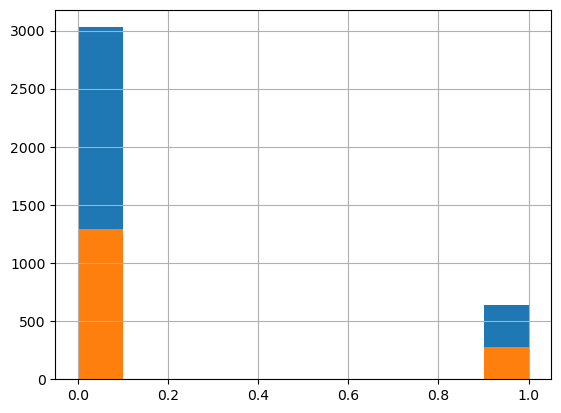

In [21]:
Y_train.hist()
Y_val.hist()

In [22]:
cat_cols = X_train.select_dtypes(include='object').columns.tolist()


model = CatBoostClassifier(
    n_estimators=2000,
    learning_rate=0.01,
    task_type="GPU",
    silent=True,
    early_stopping_rounds=200,
    random_state=42,
#     depth=2
)

model.fit(
    X_train,
    Y_train,
    eval_set=(X_val, Y_val),
    cat_features=cat_cols,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [23]:
model.set_probability_threshold(0.23)

print('accuracy = {}'.format(accuracy_score(model.predict(X_val), Y_val)))
print('f1 = {}'.format(f1_score(model.predict(X_val), Y_val)))
print('AUC = {}'.format(roc_auc_score(model.predict(X_val), Y_val)))
print('pres = {}'.format(precision_score(model.predict(X_val), Y_val)))
print('rec = {}'.format(recall_score(model.predict(X_val), Y_val)))

accuracy = 0.7886696371737747
f1 = 0.4372881355932203
AUC = 0.6481913995548847
pres = 0.4607142857142857
rec = 0.4161290322580645


In [24]:
baseline_submission = pd.DataFrame({
    'User_ID_Next_month_Activity': new_test.index,
    'Active': model.predict(new_test)
})

In [25]:
baseline_submission.User_ID_Next_month_Activity = baseline_submission.User_ID_Next_month_Activity + '_Month_5'
baseline_submission.Active.value_counts()

0    612
1    126
Name: Active, dtype: int64

In [32]:
sub = pd.merge(sample_sub.drop(columns=['Active']), baseline_submission, left_on="User_ID_Next_month_Activity", right_on="User_ID_Next_month_Activity", how="left").fillna(0)
sub

,User_ID_Next_month_Activity,Active
0,ID_4TOXNBGB_Month_5,0.0
1,ID_CHFTIP26_Month_5,0.0
2,ID_FU5GMWLQ_Month_5,0.0
3,ID_254TVBQP_Month_5,0.0
4,ID_4ENO2VFE_Month_5,0.0
...,...,...
1335,ID_PI8N2KJX_Month_5,0.0
1336,ID_L9AHTUD7_Month_5,0.0
1337,ID_BB7GLV87_Month_5,0.0
1338,ID_WB6O1NFS_Month_5,1.0


In [33]:
sub.Active.value_counts()

0.0    1214
1.0     126
Name: Active, dtype: int64

In [36]:
sub = sub.set_index('User_ID_Next_month_Activity')
sub.to_csv('negro/baseline_preds.csv')